<h1>2023.05.25. 강의 시간내 실습</h1>

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from keras.utils import to_categorical
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

In [96]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [97]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [98]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [99]:
dataset = dataset.fillna(dataset.mean())

In [100]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [101]:
X = dataset.iloc[:,0:7].values
y = dataset.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [102]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [103]:
X.shape

(398, 7, 1)

In [ ]:
encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

y_one_hot = to_categorical(y_encoded)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=0)

In [107]:
n_steps = X.shape[1]
n_steps

7

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [119]:
def build_model(): 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(40, activation='tanh'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(3, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary()

input_shape =>  7 1
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 6, 64)             192       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 3, 64)            0         
 g1D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 192)               0         
                                                                 
 dense_28 (Dense)            (None, 50)                9650      
                                                                 
 dense_29 (Dense)            (None, 40)                2040      
                                                                 
 dense_30 (Dense)            (None, 20)                820       
                                 

In [120]:
N_EPOCHS = 100

history = model.fit(X_train, y_train, epochs = N_EPOCHS, batch_size=64, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 1s 54ms/step - loss: 0.2261 - mae: 0.4612 - val_loss: 0.2040 - val_mae: 0.4258
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2039 - mae: 0.4249 - val_loss: 0.1956 - val_mae: 0.4131
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1952 - mae: 0.4109 - val_loss: 0.1916 - val_mae: 0.4034
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1913 - mae: 0.4002 - val_loss: 0.1886 - val_mae: 0.3965
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1891 - mae: 0.3986 - val_loss: 0.1880 - val_mae: 0.3892
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1874 - mae: 0.3877 - val_loss: 0.1869 - val_mae: 0.3863
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1863 - mae: 0.3859 - val_loss: 0.1861 - val_mae: 0.3826
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1853 - mae: 0.38

In [121]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.1658 - mae: 0.3488


[0.1658499538898468, 0.348829448223114]

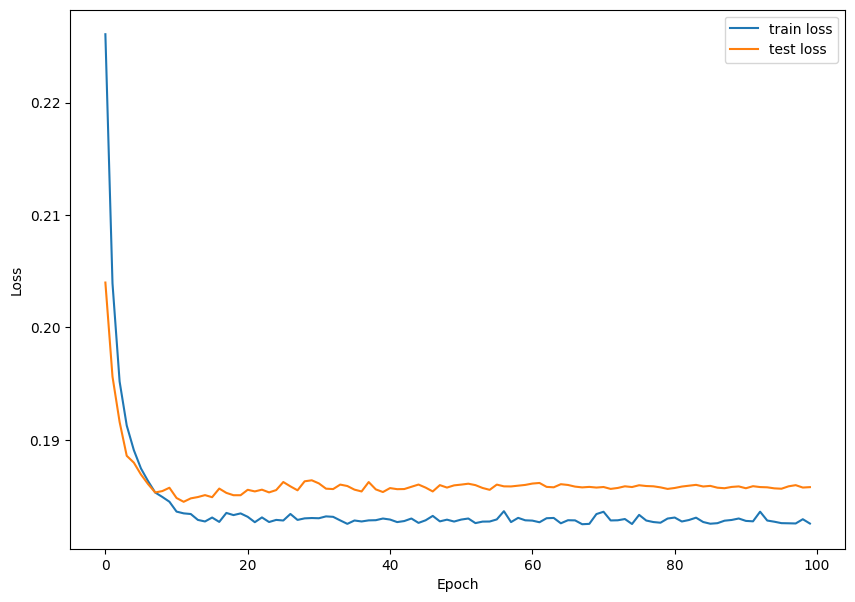

In [122]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

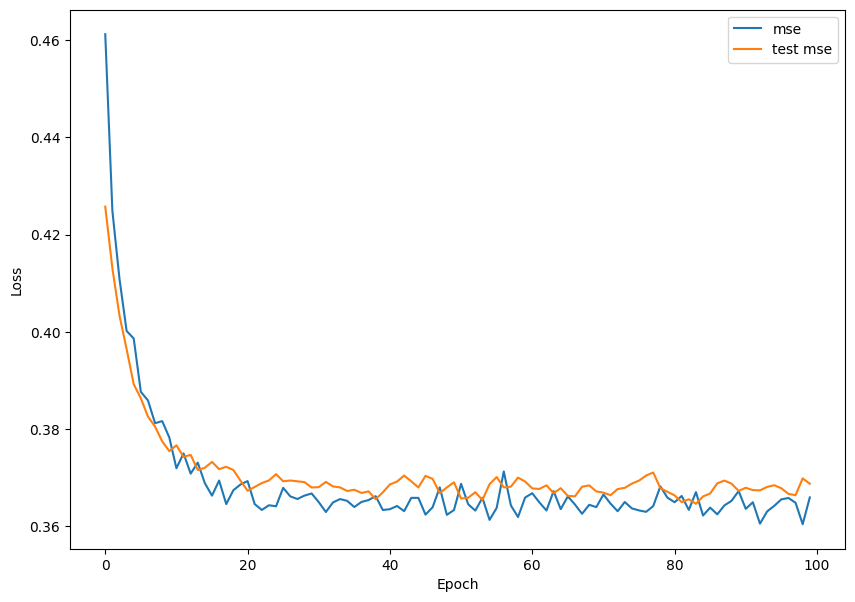

In [123]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()